# 时间序列预测

## 加载常用库

In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from pathlib import Path 
import matplotlib.pyplot as plt


## 加载硬盘文件

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
root_path = Path('/content/drive/My Drive/data/tuShare')
%cd {root_path}
%ls

/content/drive/My Drive/data/tuShare
daily/          ReadMe.gdoc      stock_company.csv  ts_all_code.csv
namechange.csv  stock_basic.csv  trade_cal.csv      ts_code_rows.csv


###  先看看所有股票数据的信息

所有股票的信息归总在ts_code_rows.csv

In [6]:
code_rows = pd.read_csv(root_path/'ts_code_rows.csv')
code_rows.shape

(3754, 2)

In [7]:
code_rows.head()

,ts_code,rows
0,600689.SH,4000
1,600690.SH,4000
2,600691.SH,4000
3,600692.SH,4000
4,600693.SH,4000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52e1d7e048>]],
      dtype=object)

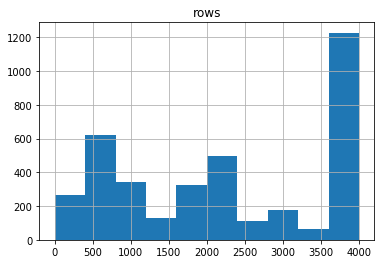

In [8]:
code_rows.hist()

In [9]:
code_rows.describe()

,rows
count,3754.000000
mean,2275.051945
std,1399.546126
min,0.000000
25%,855.500000
50%,2150.000000
75%,4000.000000
max,4000.000000


50%以上的数据都大于2150条记录，就用大于2150条记录的3754 * 0.5 = 1877条记录进行学习

In [0]:
code_rows = code_rows[code_rows.rows >= 2150]

In [11]:
code_rows.describe()

,rows
count,1878.000000
mean,3507.338126
std,686.232830
min,2150.000000
25%,2893.500000
50%,4000.000000
75%,4000.000000
max,4000.000000


In [12]:
code_rows.reset_index(inplace=True,drop=True)
code_rows

,ts_code,rows
0,600689.SH,4000
1,600690.SH,4000
2,600691.SH,4000
3,600692.SH,4000
4,600693.SH,4000
...,...,...
1873,002296.SZ,2345
1874,002297.SZ,2246
1875,002298.SZ,2337
1876,002299.SZ,2356


# 探索数据

## 单个股票数据观察

In [13]:
code_path = ['daily/{}.csv'.format(ts_code)  for ts_code in code_rows['ts_code']]
code_path

['daily/600689.SH.csv',
 'daily/600690.SH.csv',
 'daily/600691.SH.csv',
 'daily/600692.SH.csv',
 'daily/600693.SH.csv',
 'daily/600694.SH.csv',
 'daily/600695.SH.csv',
 'daily/600696.SH.csv',
 'daily/600697.SH.csv',
 'daily/600698.SH.csv',
 'daily/600699.SH.csv',
 'daily/600701.SH.csv',
 'daily/600702.SH.csv',
 'daily/600703.SH.csv',
 'daily/600704.SH.csv',
 'daily/600705.SH.csv',
 'daily/600706.SH.csv',
 'daily/600707.SH.csv',
 'daily/600708.SH.csv',
 'daily/600710.SH.csv',
 'daily/600711.SH.csv',
 'daily/600712.SH.csv',
 'daily/600713.SH.csv',
 'daily/600714.SH.csv',
 'daily/600715.SH.csv',
 'daily/600716.SH.csv',
 'daily/600717.SH.csv',
 'daily/600718.SH.csv',
 'daily/600719.SH.csv',
 'daily/600720.SH.csv',
 'daily/600721.SH.csv',
 'daily/600722.SH.csv',
 'daily/600723.SH.csv',
 'daily/600724.SH.csv',
 'daily/600725.SH.csv',
 'daily/600726.SH.csv',
 'daily/600727.SH.csv',
 'daily/600728.SH.csv',
 'daily/600729.SH.csv',
 'daily/600730.SH.csv',
 'daily/600731.SH.csv',
 'daily/600732.S

In [14]:
one_stock = pd.read_csv(root_path/code_path[0])
one_stock.describe()

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.010778e+07,9.182305,9.415730,8.992935,9.211012,9.211282,-0.000270,0.054271,45689.984835,52353.909473
std,5.074949e+04,4.007492,4.131253,3.919118,4.027552,4.027628,0.350366,3.370522,56673.322571,86296.416470
min,2.002073e+07,2.290000,2.400000,2.290000,2.340000,2.340000,-2.320000,-22.820000,675.820000,319.715000
25%,2.006121e+07,6.647500,6.810000,6.500000,6.677500,6.677500,-0.130000,-1.680000,10048.067500,6349.683750
50%,2.011021e+07,8.700000,8.910000,8.545000,8.720000,8.720000,0.010000,0.120000,26018.965000,22514.548500
75%,2.015112e+07,11.022500,11.310000,10.790000,11.090000,11.090000,0.140000,1.672500,58596.640000,59707.239250
max,2.019123e+07,25.910000,26.680000,24.600000,25.930000,25.930000,2.260000,10.140000,528263.510000,948384.733000


In [15]:
one_stock.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600689.SH,20191231,9.64,9.97,9.63,9.80,9.66,0.14,1.4493,38844.72,38199.835
1,600689.SH,20191230,9.52,9.68,9.41,9.66,9.57,0.09,0.9404,17645.70,16899.207
2,600689.SH,20191227,9.68,9.68,9.56,9.57,9.61,-0.04,-0.4162,12860.69,12367.035
3,600689.SH,20191226,9.56,9.65,9.55,9.61,9.54,0.07,0.7338,10453.60,10036.308
4,600689.SH,20191225,9.52,9.63,9.48,9.54,9.52,0.02,0.2101,12995.01,12426.958


In [16]:
one_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
ts_code       4000 non-null object
trade_date    4000 non-null int64
open          4000 non-null float64
high          4000 non-null float64
low           4000 non-null float64
close         4000 non-null float64
pre_close     4000 non-null float64
change        4000 non-null float64
pct_chg       4000 non-null float64
vol           4000 non-null float64
amount        4000 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 343.9+ KB


In [17]:
one_stock.columns

Index(['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol', 'amount'],
      dtype='object')

In [18]:
#涨幅设置成分桶 -10到10
np.arange(-10,11)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

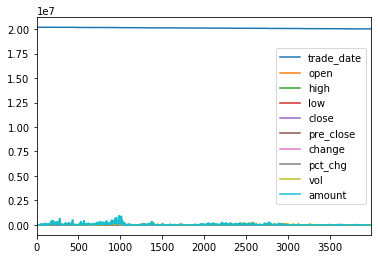

In [19]:

one_stock.plot()

##生成数据

In [0]:
CSV_COLUMNS = ['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol', 'amount']
select_columns = [ 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol', 'amount']
def get_dataset(file_path):
  dataset = tf.data.experimental.make_csv_dataset(file_path,
                                                  column_names=CSV_COLUMNS,
                                                  label_name='pct_chg',
                                                  select_columns=select_columns,
                                                  batch_size=12,#为了示例更容易展示，手动设置较小的值 
                                                  num_epochs=1,
                                                  ignore_errors=True)
  return dataset
#pathlib.Path对像要转成字符串，str(root_path)
train_data = get_dataset(str(root_path/code_path[0]))

获取一下数据看看

In [21]:
examples,labels = next(iter(train_data))# 第一个批次
print("Examples: \n",examples," \n")
print("Labels: \n",labels)

Examples: 
 OrderedDict([('trade_date', <tf.Tensor: shape=(12,), dtype=int32, numpy=
array([20040714, 20100413, 20060118, 20120719, 20080718, 20180806,
       20050523, 20111011, 20090508, 20111202, 20030214, 20031204],
      dtype=int32)>), ('open', <tf.Tensor: shape=(12,), dtype=float32, numpy=
array([ 4.96, 11.58,  3.51,  7.32,  5.56, 10.29,  2.55,  9.25,  9.09,
        9.41,  8.88,  5.67], dtype=float32)>), ('high', <tf.Tensor: shape=(12,), dtype=float32, numpy=
array([ 5.01, 11.76,  3.74,  8.16,  5.74, 10.55,  2.55,  9.31,  9.36,
        9.56,  8.98,  5.78], dtype=float32)>), ('low', <tf.Tensor: shape=(12,), dtype=float32, numpy=
array([ 4.63, 10.9 ,  3.51,  7.28,  5.3 , 10.28,  2.4 ,  9.06,  8.9 ,
        9.22,  8.86,  5.6 ], dtype=float32)>), ('close', <tf.Tensor: shape=(12,), dtype=float32, numpy=
array([ 4.75, 11.33,  3.69,  8.16,  5.72, 10.28,  2.41,  9.11,  9.3 ,
        9.23,  8.87,  5.7 ], dtype=float32)>), ('pre_close', <tf.Tensor: shape=(12,), dtype=float32, numpy=
array

In [22]:
examples.items()

odict_items([('trade_date', <tf.Tensor: shape=(12,), dtype=int32, numpy=
array([20040714, 20100413, 20060118, 20120719, 20080718, 20180806,
       20050523, 20111011, 20090508, 20111202, 20030214, 20031204],
      dtype=int32)>), ('open', <tf.Tensor: shape=(12,), dtype=float32, numpy=
array([ 4.96, 11.58,  3.51,  7.32,  5.56, 10.29,  2.55,  9.25,  9.09,
        9.41,  8.88,  5.67], dtype=float32)>), ('high', <tf.Tensor: shape=(12,), dtype=float32, numpy=
array([ 5.01, 11.76,  3.74,  8.16,  5.74, 10.55,  2.55,  9.31,  9.36,
        9.56,  8.98,  5.78], dtype=float32)>), ('low', <tf.Tensor: shape=(12,), dtype=float32, numpy=
array([ 4.63, 10.9 ,  3.51,  7.28,  5.3 , 10.28,  2.4 ,  9.06,  8.9 ,
        9.22,  8.86,  5.6 ], dtype=float32)>), ('close', <tf.Tensor: shape=(12,), dtype=float32, numpy=
array([ 4.75, 11.33,  3.69,  8.16,  5.72, 10.28,  2.41,  9.11,  9.3 ,
        9.23,  8.87,  5.7 ], dtype=float32)>), ('pre_close', <tf.Tensor: shape=(12,), dtype=float32, numpy=
array([ 4.95, 11.

##数据预处理
###分类数据
CSV 数据中的有些列是分类的列。也就是说，这些列只能在有限的集合中取值。

使用 `tf.feature_column` API 创建一个 `tf.feature_column.indicator_column `集合，每个 `tf.feature_column.indicator_column `对应一个分类的列。

In [0]:
CATEGORIES = {
    'pct_chg': np.arange(-10,11)
}
categorical_columns =[]
for feature,vocab in CATEGORIES.items():
  cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
      key=feature,vocabulary_list=vocab
  )
  categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [24]:
#你刚才创建的内容
categorical_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='pct_chg', vocabulary_list=(-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), dtype=tf.int64, default_value=-1, num_oov_buckets=0))]

#通过pandas处理数据

In [25]:
df = pd.read_csv(root_path/code_path[0])
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600689.SH,20191231,9.64,9.97,9.63,9.80,9.66,0.14,1.4493,38844.72,38199.835
1,600689.SH,20191230,9.52,9.68,9.41,9.66,9.57,0.09,0.9404,17645.70,16899.207
2,600689.SH,20191227,9.68,9.68,9.56,9.57,9.61,-0.04,-0.4162,12860.69,12367.035
3,600689.SH,20191226,9.56,9.65,9.55,9.61,9.54,0.07,0.7338,10453.60,10036.308
4,600689.SH,20191225,9.52,9.63,9.48,9.54,9.52,0.02,0.2101,12995.01,12426.958


In [26]:
df.dtypes

ts_code        object
trade_date      int64
open          float64
high          float64
low           float64
close         float64
pre_close     float64
change        float64
pct_chg       float64
vol           float64
amount        float64
dtype: object

In [0]:
df['trade_date'] = pd.to_datetime(df['trade_date'],format='%Y%m%d').dt.dayofweek

In [28]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600689.SH,1,9.64,9.97,9.63,9.80,9.66,0.14,1.4493,38844.72,38199.835
1,600689.SH,0,9.52,9.68,9.41,9.66,9.57,0.09,0.9404,17645.70,16899.207
2,600689.SH,4,9.68,9.68,9.56,9.57,9.61,-0.04,-0.4162,12860.69,12367.035
3,600689.SH,3,9.56,9.65,9.55,9.61,9.54,0.07,0.7338,10453.60,10036.308
4,600689.SH,2,9.52,9.63,9.48,9.54,9.52,0.02,0.2101,12995.01,12426.958


In [0]:
#使用np.floor向下取整
df['pct_chg'] = np.floor(df['pct_chg'])

df.pop('ts_code')
target = df.pop('pct_chg')
#训练数据后退1条，目标涨幅去掉最后一条
df = df[1:]
target = target[:-1]

In [30]:
target

0       1.0
1       0.0
2      -1.0
3       0.0
4       0.0
       ... 
3994   -1.0
3995    0.0
3996   -1.0
3997   -1.0
3998    0.0
Name: pct_chg, Length: 3999, dtype: float64

In [31]:
df

,trade_date,open,high,low,close,pre_close,change,vol,amount
1,0,9.52,9.68,9.41,9.66,9.57,0.09,17645.70,16899.207
2,4,9.68,9.68,9.56,9.57,9.61,-0.04,12860.69,12367.035
3,3,9.56,9.65,9.55,9.61,9.54,0.07,10453.60,10036.308
4,2,9.52,9.63,9.48,9.54,9.52,0.02,12995.01,12426.958
5,1,9.38,9.54,9.33,9.52,9.39,0.13,11684.00,11064.612
...,...,...,...,...,...,...,...,...,...
3995,4,10.68,10.75,10.65,10.70,10.69,0.01,1308.53,1399.025
3996,3,10.74,10.80,10.60,10.69,10.74,-0.05,1711.01,1828.389
3997,2,10.83,10.89,10.70,10.74,10.84,-0.10,2300.58,2477.650
3998,1,10.84,10.89,10.72,10.84,10.84,0.00,1782.28,1922.997


In [0]:
dataset = tf.data.Dataset.from_tensor_slices((df.values,target.values))

In [33]:
for feat, targ in dataset.take(5):
  print('Features: {}, Target: {}'.format(feat,targ))

Features: [0.0000000e+00 9.5200000e+00 9.6800000e+00 9.4100000e+00 9.6600000e+00
 9.5700000e+00 9.0000000e-02 1.7645700e+04 1.6899207e+04], Target: 1.0
Features: [ 4.0000000e+00  9.6800000e+00  9.6800000e+00  9.5600000e+00
  9.5700000e+00  9.6100000e+00 -4.0000000e-02  1.2860690e+04
  1.2367035e+04], Target: 0.0
Features: [3.0000000e+00 9.5600000e+00 9.6500000e+00 9.5500000e+00 9.6100000e+00
 9.5400000e+00 7.0000000e-02 1.0453600e+04 1.0036308e+04], Target: -1.0
Features: [2.0000000e+00 9.5200000e+00 9.6300000e+00 9.4800000e+00 9.5400000e+00
 9.5200000e+00 2.0000000e-02 1.2995010e+04 1.2426958e+04], Target: 0.0
Features: [1.0000000e+00 9.3800000e+00 9.5400000e+00 9.3300000e+00 9.5200000e+00
 9.3900000e+00 1.3000000e-01 1.1684000e+04 1.1064612e+04], Target: 0.0


随机读取（shuffle）并批量处理数据集。

In [0]:
train_dataset = dataset.shuffle(len(df)).batch(1)

###创建并训练模型

In [0]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model



In [36]:
model = get_compiled_model()
model.fit(train_dataset,epochs=15)

Train for 3999 steps
Epoch 1/15
3999/3999 [==============================] - 13s 3ms/step - loss: -35704.4835 - accuracy: 0.1868
Epoch 2/15
3999/3999 [==============================] - 11s 3ms/step - loss: -427288.4182 - accuracy: 0.1880
Epoch 3/15
3999/3999 [==============================] - 11s 3ms/step - loss: -1442707.7381 - accuracy: 0.1880
Epoch 4/15
3999/3999 [==============================] - 11s 3ms/step - loss: -3380025.7405 - accuracy: 0.1880
Epoch 5/15
3999/3999 [==============================] - 11s 3ms/step - loss: -6412597.1166 - accuracy: 0.1880
Epoch 6/15
3999/3999 [==============================] - 11s 3ms/step - loss: -11306616.1261 - accuracy: 0.1880
Epoch 7/15
3999/3999 [==============================] - 11s 3ms/step - loss: -17653890.5603 - accuracy: 0.1880
Epoch 8/15
3999/3999 [==============================] - 11s 3ms/step - loss: -26098054.1420 - accuracy: 0.1880
Epoch 9/15
3999/3999 [==============================] - 11s 3ms/step - loss: -36919655.4315 - accur

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  100       
_________________________________________________________________
dense_1 (Dense)              multiple                  110       
_________________________________________________________________
dense_2 (Dense)              multiple                  11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


**总结**：这个简单的模型对于只有今天的数据想预测明天的数据效果是不理想的

### 整体数据模型
尝试使用大于2150条数据的所有股票，让每一个股票做为一个数据，进行学习

In [0]:
train_filepaths = ['/content/drive/My Drive/data/tuShare/daily/{}.csv'.format(ts_code)  for ts_code in code_rows['ts_code']]

In [39]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths)
print(filepath_dataset)

<ShuffleDataset shapes: (), types: tf.string>


In [40]:
for line in filepath_dataset.take(5):
  print(line.numpy())

b'/content/drive/My Drive/data/tuShare/daily/002187.SZ.csv'
b'/content/drive/My Drive/data/tuShare/daily/000882.SZ.csv'
b'/content/drive/My Drive/data/tuShare/daily/600768.SH.csv'
b'/content/drive/My Drive/data/tuShare/daily/002224.SZ.csv'
b'/content/drive/My Drive/data/tuShare/daily/002230.SZ.csv'


然后，可以调用leave()方法，一次读取5个文件，做交叉操作（跳过第一行表头，使用skip()方法）：

In [0]:
def get_one_file(filepath):
  data = pd.read_csv(filepath)#读取文件
  #将日期转化成星期
  data['trade_date'] = pd.to_datetime(data['trade_date'],format='%Y%m%d').dt.dayofweek
  train_data = data[1:2150]
  target = data[:2149]['pct_chg']
  #tf.data.
  train_data_dataset = tf.data.Dataset.from_tensor_slices((train_data.values,target.values))
  return train_data_dataset
  #tf.data.Dataset.from_tensor_slices()
  #return tf.data.TextLineDataset(filepath).skip(1)

In [42]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
#从文件中读取一行数据
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=10
)
for line in dataset.take(5):
  print(line.numpy())

b'600643.SH,20191231,9.66,9.71,9.53,9.6,9.69,-0.09,-0.9288,198348.17,190105.324'
b'002061.SZ,20191231,5.81,5.93,5.81,5.87,5.8,0.07,1.2069,91128.03,53526.124'
b'002224.SZ,20191231,6.13,6.21,6.09,6.15,6.19,-0.04,-0.6462,106659.03,65511.311'
b'000720.SZ,20191231,5.55,5.58,5.45,5.45,5.53,-0.08,-1.4467,64027.0,35199.381'
b'002232.SZ,20191231,8.62,8.83,8.5,8.69,8.65,0.04,0.4624,57119.94,49789.661'


In [43]:
def get_file(filepath):
  print(filepath)
  #return tf.data.Dataset.from_tensors([5,6])
  print(train_filepaths[1])
  data = pd.read_csv(train_filepaths[1])
  #data.pop('trade_date')
  #print(tf.data.Dataset.from_tensors(data.values))
  return tf.data.Dataset.from_tensors([5,6])
dataset2 = filepath_dataset.interleave(
    get_file,
    cycle_length=10
)
for line in dataset2.take(5):
  print(line.numpy())

Tensor("args_0:0", shape=(), dtype=string)
/content/drive/My Drive/data/tuShare/daily/600690.SH.csv
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: LIVE_VARS_IN
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: LIVE_VARS_IN
[5 6]
[5 6]
[5 6]
[5 6]
[5 6]


###重新试验

In [44]:
list_ds = tf.data.Dataset.list_files(train_filepaths)

for f in list_ds.take(5):
  print(f.numpy())

b'/content/drive/My Drive/data/tuShare/daily/600992.SH.csv'
b'/content/drive/My Drive/data/tuShare/daily/002320.SZ.csv'
b'/content/drive/My Drive/data/tuShare/daily/600340.SH.csv'
b'/content/drive/My Drive/data/tuShare/daily/300075.SZ.csv'
b'/content/drive/My Drive/data/tuShare/daily/600322.SH.csv'


In [53]:
def process_path(file_path):
  label = tf.strings.split(file_path, '/')[-2]
  #print(tf.strings.as_string(file_path))
  print(file_path)
  
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

Tensor("args_0:0", shape=(), dtype=string)


In [48]:
for image_raw, label_text in labeled_ds.take(1):
  print(repr(image_raw.numpy()[:200]))
  print()
  print(label_text.numpy())

b'ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount\n600180.SH,20191231,6.99,7.02,6.92,6.98,7.03,-0.05,-0.7112,45735.36,31890.595\n600180.SH,20191230,6.89,7.03,6.84,7.03,6.9,0.13,'

b'daily'
